# Monosynaptic pair analysis
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

os.chdir('../..')
print(os.getcwd())

from synapticonn.plots import plot_acg, plot_ccg
from synapticonn.postprocessing import compute_crosscorrelogram
from synapticonn.postprocessing import compute_autocorrelogram

import synapticonn as synapticonn

/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'BD0187_spikesorting_array.pkl')

# open pickle
all_units = np.load(data_fpath, allow_pickle=True)
all_units = all_units['spike_time_set']
# spike_train_1 = all_units[0]/30_000  # unit 0
# spike_train_2 = all_units[1]/30_000  # unit 1

Set parameters.

In [3]:
srate = 30_000
bin_size_ms = 0.5
max_lag_ms = 25

Initialize the object.

In [4]:
snc = synapticonn.SynaptiConn(all_units, bin_size_ms=1, max_lag_ms=100, srate=30_000, recording_length=600)

Check the loaded spike units.

In [5]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,5,302
1,1,1152
2,0,918
3,16,524
4,17,315
5,18,195
6,15,192
7,4,299
8,3,277


## Auto-correlograms
---

Compute the autocorrelogram for select unit IDs.

Plotting autocorrelogram for spike units: [3 1]


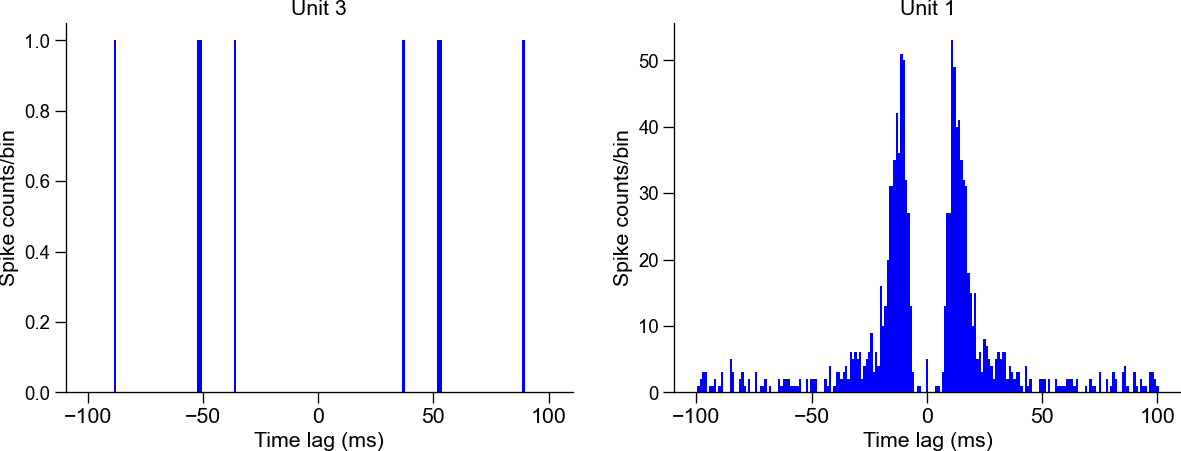

In [6]:
snc.plot_autocorrelogram(spike_units=[3,1,100], color='blue')

Set the bin parameters after initialization, and re-plot.

This can be used to change the binning on the plots, and max time lags.

Plotting autocorrelogram for spike units: [0 1]


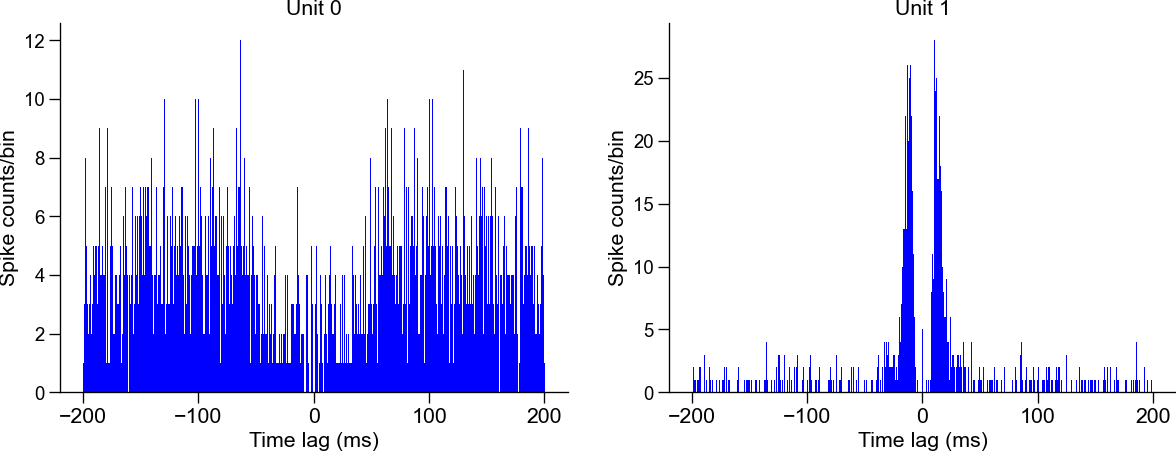

In [7]:
snc.set_bin_settings(bin_size_ms=0.5, max_lag_ms=200)
snc.plot_autocorrelogram(spike_units=[0,1], color='blue')

## Cross-correlograms
----

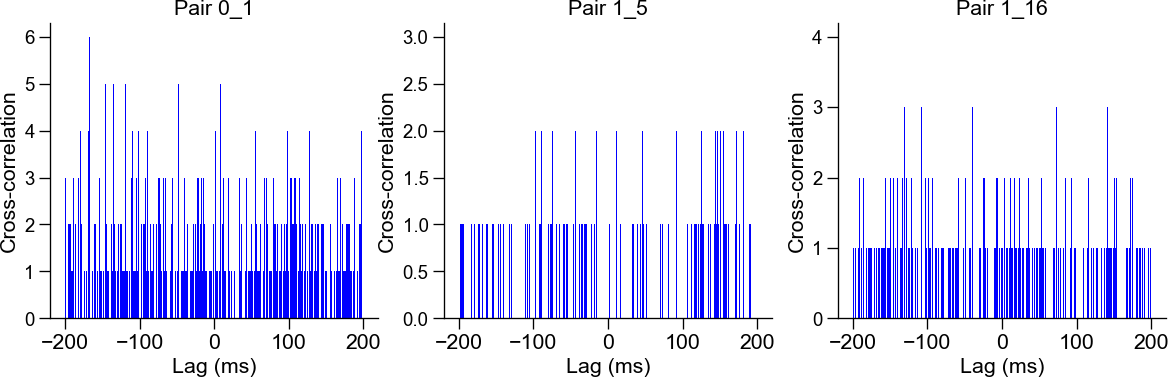

In [8]:
spike_pairs = [(1,16), (1,5), (0,1), (1,16)]
snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(15, 4))

Alternatively, all possible pairs can be plotted.

In [9]:
# spike_labels = snc.get_spike_unit_labels()

# # get all possible pairs between labels as tuples (including self-pairs)
# spike_pairs = [(i, j) for i in spike_labels for j in spike_labels]
# snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(20, 30))

## Return correlogram data
----

Next, return the correlogram data.

Each key in 'cross_correlations' is indexed by the unit pairs. The corresponding numbers refer to the spike counts, per bin.

Each key in 'bins' is also indexed by the unit pairs. The corresponding numbers refer to the bins edges.

In [10]:
correlogram_data = snc.return_crosscorrelogram_data(spike_pairs=spike_pairs)
correlogram_data

{'cross_correllations': {'0_1': array([0, 3, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1,
         3, 0, 3, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 3, 4, 0, 1, 1, 4, 0, 4,
         2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 4, 0, 6,
         0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 3, 1,
         2, 0, 3, 1, 3, 2, 1, 1, 0, 1, 0, 5, 0, 2, 1, 1, 1, 2, 0, 0, 5, 1,
         2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 3, 1, 1, 1, 1, 5, 1,
         2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
         1, 5, 1, 1, 3, 1, 2, 2, 5, 1, 1, 2, 1, 1, 3, 0, 0, 0, 2, 1, 2, 0,
         0, 4, 3, 5, 2, 4, 0, 1, 2, 1, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 0, 4,
         2, 0, 0, 3, 0, 2, 3, 2, 0, 0, 1, 3, 2, 0, 0, 2, 2, 3, 1, 0, 1, 0,
         2, 4, 0, 1, 0, 3, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2,
         0, 2, 2, 2, 0, 1, 0, 1, 3, 2, 1, 3, 2, 1, 2, 3, 1, 0, 0, 0, 2, 1,
         3, 3, 1, 0, 1, 3, 3, 1, 1, 4, 0, 1, 1, 0, 1, 0, 0, 0, 1, 4, 1

Check the bin settings using for correlogram generations.

In [11]:
snc.report_correlogram_settings()

'Bin size: 0.5 ms, Max lag: 200 ms'

Simulate an excitatory-excitatory crosscorrelogram.

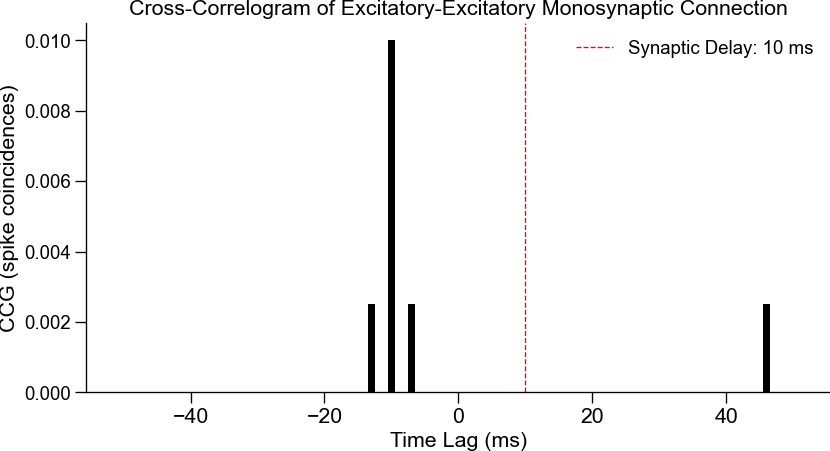

In [21]:
# Parameters
duration = 400  # Duration in ms
bin_size = 1    # Bin size in ms for spike trains and CCG
synaptic_delay = 10  # Synaptic delay in ms
firing_rate = 0.01  # Probability of a spike per bin for neuron 1 (10 Hz)

# Generate random spike train for neuron 1 using a Poisson process
np.random.seed(42)
neuron1_spike_train = np.random.rand(duration // bin_size) < firing_rate

# Generate spike train for neuron 2 with a synaptic delay
neuron2_spike_train = np.zeros_like(neuron1_spike_train)
for i in range(len(neuron1_spike_train) - synaptic_delay):
    if neuron1_spike_train[i]:
        neuron2_spike_train[i + synaptic_delay] = 1

# Compute CCG
lags = np.arange(-50, 51)  # Range of lags for CCG, in ms
ccg = np.zeros_like(lags, dtype=float)

for lag_idx, lag in enumerate(lags):
    shifted_neuron2 = np.roll(neuron2_spike_train, lag)
    ccg[lag_idx] = np.sum(neuron1_spike_train * shifted_neuron2) / duration

# Plot CCG
plt.figure(figsize=(10, 5))
plt.bar(lags, ccg, width=1, color='black')
plt.xlabel('Time Lag (ms)')
plt.ylabel('CCG (spike coincidences)')
plt.title('Cross-Correlogram of Excitatory-Excitatory Monosynaptic Connection')
plt.axvline(x=synaptic_delay, color='red', linestyle='--', label=f'Synaptic Delay: {synaptic_delay} ms')
plt.legend()
plt.show()

Apply a jitter.

Upper confidence: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Lower confidence: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


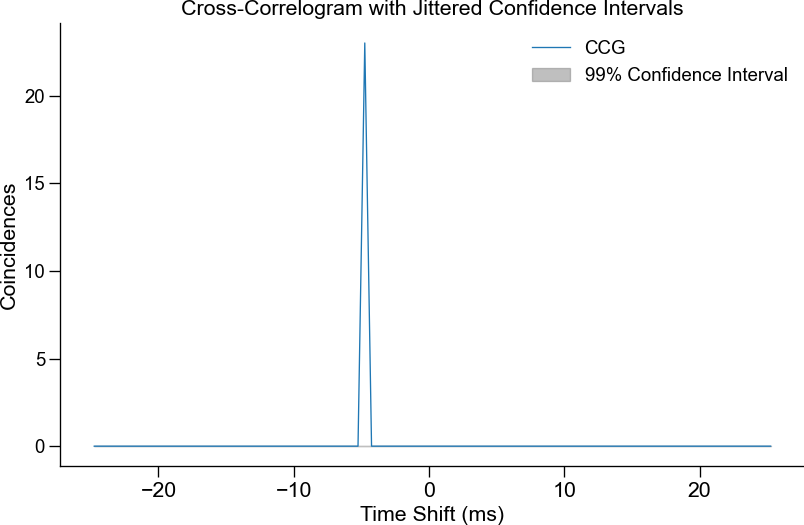

In [48]:
def generate_ccg(pre_spike_train, post_spike_train, max_shift=25, bin_size=0.5):
    """
    Generate a cross-correlogram (CCG) between two spike trains with given max shift and bin size.
    
    Parameters:
    - pre_spike_train: array-like, spike times for the pre-cell
    - post_spike_train: array-like, spike times for the post-cell
    - max_shift: float, max temporal shift for CCG calculation in ms
    - bin_size: float, size of each bin in ms
    
    Returns:
    - ccg_bins: array of bin centers
    - ccg_counts: array of CCG values for each bin
    """
    time_shifts = np.arange(-max_shift, max_shift + bin_size, bin_size)
    ccg_counts = []
    
    for shift in time_shifts:
        shifted_post_spike_train = post_spike_train + shift
        coincidences = np.isin(pre_spike_train, shifted_post_spike_train)
        ccg_counts.append(np.sum(coincidences))
    
    ccg_bins = time_shifts + bin_size / 2
    return ccg_bins, ccg_counts

def apply_jitter(spike_train, jitter_range=10):
    """
    Apply random jitter to a spike train within a specified range.
    
    Parameters:
    - spike_train: array-like, original spike train to jitter
    - jitter_range: float, jitter range in ms (± jitter_range)
    
    Returns:
    - jittered_spike_train: array of jittered spike times
    """
    jittered_spike_train = spike_train + np.random.uniform(-jitter_range, jitter_range, size=len(spike_train))
    return jittered_spike_train

def calculate_jittered_ccg(pre_spike_train, post_spike_train, num_iterations=1000, max_shift=25, bin_size=0.5, jitter_range=10):
    """
    Calculate the jittered cross-correlogram and confidence intervals.
    
    Parameters:
    - pre_spike_train: array-like, spike times for the pre-cell
    - post_spike_train: array-like, spike times for the post-cell
    - num_iterations: int, number of jitter iterations
    - max_shift: float, max temporal shift for CCG calculation in ms
    - bin_size: float, size of each bin in ms
    - jitter_range: float, jitter range in ms (± jitter_range)
    
    Returns:
    - ccg_bins: array of bin centers
    - ccg_counts: array of CCG values for each bin
    - upper_conf: array, upper confidence limit for each bin (99%)
    - lower_conf: array, lower confidence limit for each bin (1%)
    """
    # Original CCG calculation
    ccg_bins, ccg_counts = generate_ccg(pre_spike_train, post_spike_train, max_shift, bin_size)
    jittered_ccgs = np.zeros((num_iterations, len(ccg_bins)))
    
    # Jitter iterations
    for i in range(num_iterations):
        jittered_post_spike_train = apply_jitter(post_spike_train, jitter_range)
        _, jittered_ccg_counts = generate_ccg(pre_spike_train, jittered_post_spike_train, max_shift, bin_size)
        jittered_ccgs[i, :] = jittered_ccg_counts
    
    # Confidence intervals (1% and 99%)
    upper_conf = np.percentile(jittered_ccgs, 99, axis=0)  # TO DO: check this
    lower_conf = np.percentile(jittered_ccgs, 1, axis=0)
    
    return ccg_bins, ccg_counts, upper_conf, lower_conf

# Example spike trains (in ms)
pre_spike_train = np.array([10, 50, 90, 130, 170, 210, 250, 290, 330, 370, 330, 370, 330, 370, 330, 370, 370, 330, 370, 330, 370, 330, 370])
post_spike_train = np.array([15, 55, 95, 135, 175, 215, 255, 295, 335, 375, 335, 375, 335, 375, 335, 375, 375, 335, 375, 335, 375, 335, 375])

# Calculate jittered CCG with confidence intervals
ccg_bins, ccg_counts, upper_conf, lower_conf = calculate_jittered_ccg(pre_spike_train, post_spike_train)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ccg_bins, ccg_counts, label="CCG")
print(f'Upper confidence: {upper_conf}')
print(f'Lower confidence: {lower_conf}')
plt.fill_between(ccg_bins, lower_conf, upper_conf, color='gray', alpha=0.5, label="99% Confidence Interval")
plt.xlabel("Time Shift (ms)")
plt.ylabel("Coincidences")
plt.title("Cross-Correlogram with Jittered Confidence Intervals")
plt.legend()
plt.show()

Standardized synaptic interaction strength (Z): 3.0021272728821295


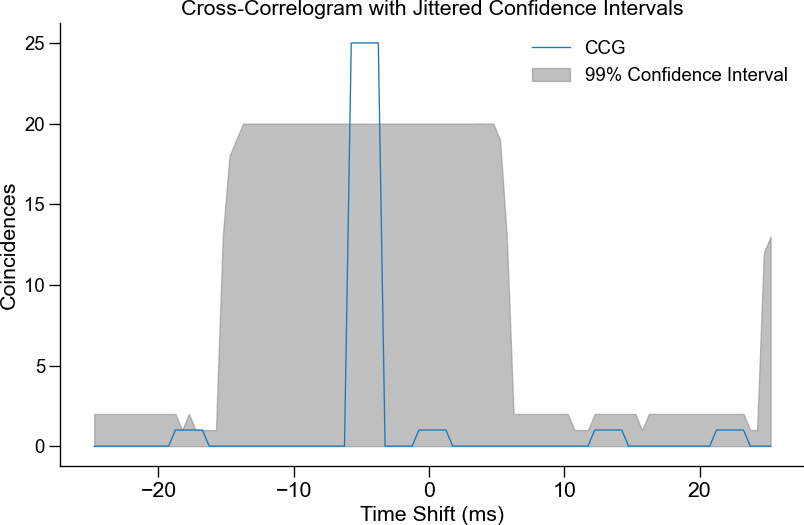

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ccg(pre_spike_train, post_spike_train, max_shift=25, bin_size=0.5, coincidence_window=1):
    """
    Generate a cross-correlogram (CCG) between two spike trains with a coincidence window.
    """
    time_shifts = np.arange(-max_shift, max_shift + bin_size, bin_size)
    ccg_counts = []

    for shift in time_shifts:
        shifted_post_spike_train = post_spike_train + shift
        coincidences = np.sum([
            np.any(np.abs(pre_spike - shifted_post_spike_train) <= coincidence_window)
            for pre_spike in pre_spike_train
        ])
        ccg_counts.append(coincidences)
    
    ccg_bins = time_shifts + bin_size / 2
    return ccg_bins, ccg_counts

def apply_jitter(spike_train, jitter_range=10):
    """
    Apply random jitter to a spike train within a specified range.
    """
    jittered_spike_train = spike_train + np.random.uniform(-jitter_range, jitter_range, size=len(spike_train))
    return jittered_spike_train

def calculate_jittered_ccg(pre_spike_train, post_spike_train, num_iterations=1000, max_shift=25, bin_size=0.5, jitter_range=10):
    """
    Calculate the jittered cross-correlogram and confidence intervals.
    """
    # Original CCG calculation
    ccg_bins, ccg_counts = generate_ccg(pre_spike_train, post_spike_train, max_shift, bin_size)
    jittered_ccgs = np.zeros((num_iterations, len(ccg_bins)))
    
    # Jitter iterations
    for i in range(num_iterations):
        jittered_post_spike_train = apply_jitter(post_spike_train, jitter_range)
        _, jittered_ccg_counts = generate_ccg(pre_spike_train, jittered_post_spike_train, max_shift, bin_size)
        jittered_ccgs[i, :] = jittered_ccg_counts
    
    # Confidence intervals (1% and 99%)
    upper_conf = np.percentile(jittered_ccgs, 99, axis=0)
    lower_conf = np.percentile(jittered_ccgs, 1, axis=0)
    
    return ccg_bins, ccg_counts, upper_conf, lower_conf, jittered_ccgs

def calculate_synaptic_strength_z(ccg_bins, ccg_counts, jittered_ccgs, window=4):
    """
    Calculate the standardized value (z-score) of the peak bin count in the actual CCG
    within a specified window around zero shift.
    """
    # Define the window around zero shift
    window_mask = (ccg_bins >= -window / 2) & (ccg_bins <= window / 2)
    
    # Extract the peak count in the actual CCG within the window
    actual_peak = np.max(np.array(ccg_counts)[window_mask])
    
    # Calculate mean and standard deviation of jittered CCG values within the window
    jittered_window_counts = jittered_ccgs[:, window_mask]
    mean_jittered = np.mean(jittered_window_counts)
    std_jittered = np.std(jittered_window_counts)
    
    # Calculate the z-score
    if std_jittered == 0:
        print("Standard deviation of jittered CCGs is zero; z-score cannot be calculated.")
        Z = np.nan  # Or handle as appropriate
    else:
        Z = (actual_peak - mean_jittered) / std_jittered
    
    return Z

# Example spike trains (in ms)
pre_spike_train = np.array([10, 50, 90, 130, 170, 210, 250, 290, 330, 370, 290, 330, 370, 290, 330, 370, 290, 330, 37, 370, 290, 330, 370, 370, 290, 330, 3700])
post_spike_train = np.array([15, 55, 95, 135, 175, 215, 255, 295, 335, 375, 295, 335, 375, 295, 335, 375, 295, 335, 375, 375, 295, 335, 37, 375, 295, 335, 37])

# Calculate jittered CCG with confidence intervals and return jittered CCGs for z-score calculation
ccg_bins, ccg_counts, upper_conf, lower_conf, jittered_ccgs = calculate_jittered_ccg(pre_spike_train, post_spike_train)

# Calculate Z-score for synaptic strength
Z = calculate_synaptic_strength_z(ccg_bins, ccg_counts, jittered_ccgs=jittered_ccgs, window=10)  # window should be 4 ms ....
print(f"Standardized synaptic interaction strength (Z): {Z}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ccg_bins, ccg_counts, label="CCG")
plt.fill_between(ccg_bins, lower_conf, upper_conf, color='gray', alpha=0.5, label="99% Confidence Interval")
plt.xlabel("Time Shift (ms)")
plt.ylabel("Coincidences")
plt.title("Cross-Correlogram with Jittered Confidence Intervals")
plt.legend()
plt.show()

In [ ]:
# Check the jittered CCG outputs; why is it returning something else?
# In this analysis, the jitter serves as a way to simulate a random or chance distribution of spike coincidences between the two cells.
# By adding small, random shifts (jitter) to the spike times of the post-cell,
# we can generate many different randomized versions of the spike train. Here's how this affects the analysis.

## TO DO:
-----

- Plot all the data out

- Make an option to add new data -- therefore clearing the previous data here

- Check this analysis with a DANDI dataset

- Return ACG data

- Test units

- Style is not being fitted globally --> the decorator is useless?

- Document all the steps in place to check this all out ...

- Option to improve the labels here for the units? Check it with different input types

- Build a core object which allows for batch-processing, but also adds in the srates etc. of the recordings

- Option to cross-check with the distances???

- Option to change individual colors for CCGs?

- Merge the CCG and ACG decorators into one?

- For autocorrelograms:
    - ensure that the input is a list type 
    - add a function to check the lags and the bins for this etc.
    - check whether unit ids can be in str format etc.

- Plot_ccg is computing and then plotssing --> should be separate?

- Analysis for CCG and ACG should be separated?

- Check the CCG binning --> test this!

- Check the type hinting / remove these?